In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [2]:
import pickle
with open('data/google_locations.pkl', "rb") as fout:
    google=pickle.load(fout)

In [3]:
company_locations_pkl_files = ['data/google_locations.pkl', 'data/apple_locations.pkl', 'data/facebook_locations.pkl']

company_locations_colors = {
    'data/google_locations': 'green',
    'data/apple_locations': 'red',
    'data/facebook_locations': 'blue'
}

company_locations = { c.split('.')[0]: { 
    'longitudes': [], 'latitudes': [], 'locations': [] 
} for c in company_locations_pkl_files }

In [4]:
import pickle

for pkl_file in company_locations_pkl_files:
    with open(pkl_file, 'rb') as f:
        company_locations[pkl_file.split('.')[0]] = pickle.load(f)
        
company_locations['data/google_locations']['longitudes'][0:10]

[-79.9900861,
 -122.0363496,
 -122.4110835,
 121.4888922,
 103.8520359,
 121.5636796,
 151.2164539,
 34.7805274,
 126.9782914,
 -97.7436995]

In [5]:
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame


lon = company_locations['data/google_locations']['longitudes']
lat = company_locations['data/google_locations']['latitudes']
key = company_locations['data/google_locations']['locations']

geometry = [Point(xy) for xy in zip(lon, lat)]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(key, crs=crs, geometry=geometry)
gdf.head(10)

0                               geometry
0    Pittsburgh, PA, USA         POINT (-79.9900861 40.4416941)
1     Sunnyvale, CA, USA        POINT (-122.0363496 37.3688301)
2     San Bruno, CA, USA        POINT (-122.4110835 37.6304904)
3        Shanghai, China         POINT (121.4888922 31.2253441)
4              Singapore          POINT (103.8520359 1.2904753)
5         Taipei, Taiwan         POINT (121.5636796 25.0375198)
6  Sydney NSW, Australia        POINT (151.2164539 -33.8548157)
7  Tel Aviv-Yafo, Israel          POINT (34.7805274 32.0804808)
8     Seoul, South Korea         POINT (126.9782914 37.5666791)
9        Austin, TX, USA  POINT (-97.74369950000001 30.2711286)

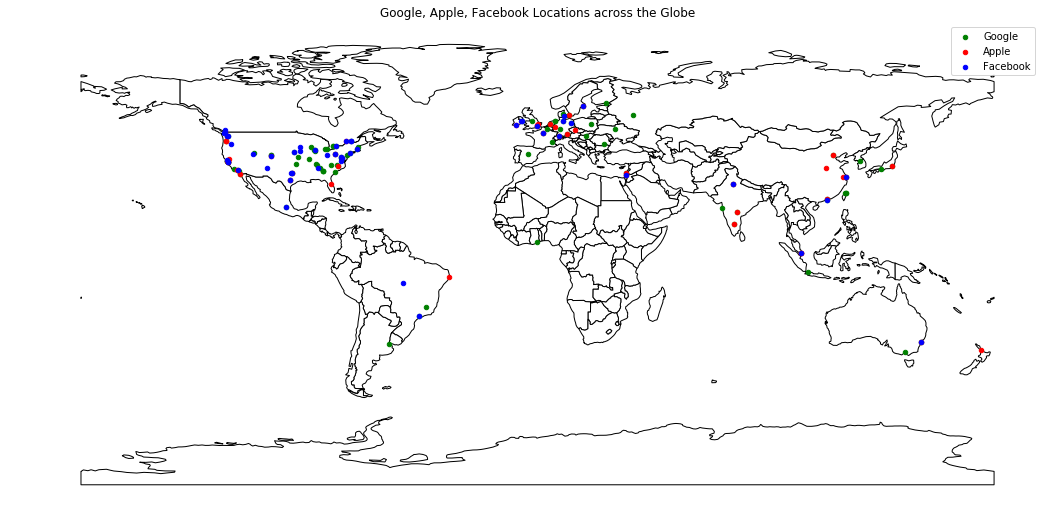

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.plot(color='white', edgecolor='black',figsize=(18,16))
world.legend(['google', 'apple', 'facebook'], title='legend')

for company, color in company_locations_colors.items():
    lon = company_locations[company]['longitudes']
    lat = company_locations[company]['latitudes']
    key = company_locations[company]['locations']
    geometry = [Point(xy) for xy in zip(lon, lat)]
    
    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}
    # Creating a Geographic data frame 
    gdf = gpd.GeoDataFrame(key, crs=crs, geometry=geometry)
    gdf.plot(ax=world, marker='o', color=color, markersize=20)
    
world.set_title('Google, Apple, Facebook Locations across the Globe')
world.legend(['Google', 'Apple', 'Facebook'])
world.set_axis_off()


In [7]:
%matplotlib inline

import sys
sys.path.insert(0, '../modules/')
from fintextmin import *
import nltk

import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

df = pandas.read_csv('google_jobs.csv',encoding='iso-8859-1')
ef = pandas.read_csv('apple_jobs.csv',encoding='iso-8859-1')
ff= pandas.read_csv('facebook_jobs.csv',encoding='iso-8859-1')
df.head(10)

title               location  \
0                        Front End Software Engineer    Pittsburgh, PA, USA   
1  Software Engineer, HTML5 Video, Google Cloud P...     Sunnyvale, CA, USA   
2               Front End Software Engineer, YouTube     San Bruno, CA, USA   
3                     Software Engineer, Google Home        Shanghai, China   
4           Software Engineer, Front End Development              Singapore   
5            Wireless Software Engineer, Google Home         Taipei, Taiwan   
6          Network Engineer, Software and Automation  Sydney NSW, Australia   
7                       Software Engineer, Cloud SQL     Sunnyvale, CA, USA   
8        Software Engineer, Infrastructure (English)  Tel Aviv-Yafo, Israel   
9                                  Software Engineer     Seoul, South Korea   

                                        minimum_qual  \
0  BA/BS degree or equivalent practical experienc...   
1  BS degree in Electrical Engineering or Compute...   
2  BA/BS in Computer Science or related technical...   
3  Bachelor's degree in Computer Science, Electri...   
4  Bachelor's degree in a technical field, or equ...   
5  Master's degree in Electrical Engineering or C...   
6  BA/BS in Computer Science or related field or ...   
7  BS degree in Computer Science, similar technic...   
8  Bachelor's degree in Computer Science, a relat...   
9  Bachelor's degree in Computer Science, similar...   

                                      preferred_qual  \
0  4 years of relevant work experience, including...   
1  MS degree in Electrical Engineering or Compute...   
2  Experience with one or more general purpose pr...   
3  Experience working with hardware designers/rea...   
4  Development experience in designing modular, o...   
5  PhD degree.\nExperience with wireless protocol...   
6  Master's degree or PhD in Computer Science or ...   
7  10 years of relevant work experience in softwa...   
8  Masterâs degree.\nExperience with Unix/Linux...   
9  Masterâs degree or PhD in Engineering, Compu...   

                                    responsibilities  
0  Build next-generation web applications with a ...  
1  Design, implement and launch complex HTML5 vid...  
2  Design, implement and launch highly-visible, p...  
3  Develop the whole software stack for consumer ...  
4  Build next-generation web applications with a ...  
5  Participate in architecting, developing, testi...  
6  Engage in and improve the lifecycle of service...  
7  Work alongside the Technical Lead to drive lon...  
8  Design, develop, test, deploy, maintain and im...  
9  Design, develop, test, deploy, maintain and im...

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
loc_g_dic={}
num_g_dic={}
key_g=[]
lat_g=[]
lon_g=[]

for lo in df['location']:
    if lo in loc_g_dic:
        num_g_dic[lo]=num_g_dic[lo]+1;
        continue
    if type(lo) is str:
        num_g_dic[lo]=1;
    try:
        location = geolocator.geocode(lo)
        loc_g_dic[lo]=(location.latitude,location.longitude)
        key_g.append(lo)
        lat_g.append(location.latitude)
        lon_g.append(location.longitude)
        print(loc_g_dic[lo])
    except:
        print('error')       
print(len(loc_g_dic))
    #try:
        #location = geolocator.geocode(lo)
        #arr.append((location.lat,location.lon))
    #except:
        #print("ERROR")
        #arr.append(('none','none'))

(40.4416941, -79.9900861)
(37.3688301, -122.0363496)
(37.6304904, -122.4110835)
(31.2253441, 121.4888922)
(1.2904753, 103.8520359)
(25.0375198, 121.5636796)
(-33.8548157, 151.2164539)
(32.0804808, 34.7805274)
(37.5666791, 126.9782914)
(30.2711286, -97.7436995)
(35.6828387, 139.7594549)
(59.3251172, 18.0710935)
(35.9131542, -79.05578)
(45.5202471, -122.6741949)
(48.1371079, 11.5753822)
(52.2319237, 21.0067265)
(37.3893889, -122.0832101)
(39.906217, 116.3912757)
(37.7792808, -122.4192363)
(47.6859573, -122.1920249)
(45.4972159, -73.6103642)
(56.1496278, 10.2134046)
(40.7308619, -73.9871558)
(47.6038321, -122.3300624)
(-19.9227318, -43.9450948)
(40.0149856, -105.2705456)
(32.7174209, -117.1627714)
(43.074761, -89.3837613)
(37.4455862, -122.1619289)
error
(32.8191218, 34.9983856)
(41.8755616, -87.6244212)
(42.3750997, -71.1056157)
(43.466874, -80.524635)
(12.9791198, 77.5912997)
(51.5073219, -0.1276474)
(34.0536834, -118.2427669)
(47.4983815, 19.0404707)
(43.653963, -79.387207)
(48.8566101

In [9]:
loc_a_dic={}
num_a_dic={}
key_a=[]
lat_a=[]
lon_a=[]
for lo in ef['location']:
    if lo in loc_a_dic:
        num_a_dic[lo]=num_a_dic[lo]+1;
        continue
    if type(lo) is str:
        num_a_dic[lo]=1;
    try:
        location = geolocator.geocode(lo)
        loc_a_dic[lo]=(location.latitude,location.longitude)
        key_a.append(lo)
        lat_a.append(location.latitude)
        lon_a.append(location.longitude)
        print(loc_a_dic[lo])
    except:
        print('error')       
print(len(loc_a_dic))

(37.3541132, -121.9551744)
(30.2711286, -97.7436995)
(17.3616079, 78.4746286)
error
(47.3769434, 8.5414061)
(32.1656255, 34.8469023)
(1.3408528, 103.878446863736)
(49.9954522, 14.628005)
(47.6038321, -122.3300624)
(-8.0641931, -34.8781517)
(39.906217, 116.3912757)
(39.7392364, -104.9848623)
(12.9791198, 77.5912997)
(28.5421097, -81.3790388)
(37.7792808, -122.4192363)
(22.5445697, 114.0545346)
(32.8191218, 34.9983856)
(31.2253441, 121.4888922)
(51.8979282, -8.4705806)
(-20.8817051, 55.4497432)
(51.5073219, -0.1276474)
(48.1371079, 11.5753822)
(35.7803977, -78.6390989)
(52.2034823, 0.1235817)
(45.421106, -75.690308)
(51.7492956, -0.3422526)
(59.3251172, 18.0710935)
(32.7762719, -96.7968559)
(32.7174209, -117.1627714)
(52.3745403, 4.89797550561798)
(38.5815719, -121.4943996)
(49.2608724, -123.1139529)
(40.4416941, -79.9900861)
(37.3228934, -122.0322895)
(55.6867243, 12.5700724)
(35.6828387, 139.7594549)
(34.0211224, -118.3964665)
(45.5202471, -122.6741949)
(51.2254018, 6.7763137)
(-36.853

KeyError: nan

In [62]:
loc_f_dic={}
num_f_dic={}
key_f=[]
lat_f=[]
lon_f=[]
for lo in ff['location']:
    if lo in loc_f_dic:
        num_f_dic[lo]=num_f_dic[lo]+1;
        continue
    if type(lo) is str:
        num_f_dic[lo]=1;
    try:
        location = geolocator.geocode(lo)
        loc_f_dic[lo]=(location.latitude,location.longitude)
        key_f.append(lo)
        lat_f.append(location.latitude)
        lon_f.append(location.longitude)
        print(loc_f_dic[lo])
    except:
        print('error')       
print(len(loc_f_dic))

(40.4416941, -79.9900861)
(37.4538274, -122.1821871)
(47.6694141, -122.1238767)
(32.7762719, -96.7968559)
(51.5073219, -0.1276474)
(47.6038321, -122.3300624)
(49.7031267, -123.1378341)
(34.0536834, -118.2427669)
(47.3769434, 8.5414061)
(42.3602534, -71.0582912)
(32.0804808, 34.7805274)
(45.42226195, -75.6397071198492)
(40.7308619, -73.9871558)
(30.2711286, -97.7436995)
(48.8265445, -123.6264973)
(51.8979282, -8.4705806)
error
(1.2904753, 103.8520359)
(48.8566101, 2.3514992)
(53.3497645, -6.2602732)
(45.5073725, -73.6050824)
(38.8950092, -77.0365625)
error
(44.2998261, -120.834972)
(41.1544433, -96.0422378)
(34.8142093, -106.7613067)
(43.2624559, -93.6371591)
(34.729847, -86.5859011)
(53.4104332, -6.4404037)
(37.8590272, -122.4854694)
(22.2793278, 114.1628131)
(41.6441557, -93.4646571)
(40.3066676, -112.0147617)
(28.4646148, 77.0299194)
(31.2253441, 121.4888922)
(37.3688301, -122.0363496)
(49.2850624, -123.135817450772)
error
(39.0437192, -77.4874899)
error
error
error
(45.4972159, -73.